In [1]:
import os
import csv
import os.path
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'data.csv')
open(csvfile, "r")
data=pd.read_csv(csvfile, header=0)
data.head()



,date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
0,1/11/2016 17:00,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000
1,1/11/2016 17:10,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667
2,1/11/2016 17:20,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333
3,1/11/2016 17:30,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000
4,1/11/2016 17:40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667


In [2]:
data["date"] = pd.to_datetime(data['date'])
data.set_index('date').resample('M')["TotalConsmp"].describe()

date             
2016-01-31  count    2922.000000
            mean      101.748802
            std       127.429977
            min        10.000000
            25%        40.000000
            50%        50.000000
            75%        90.000000
            max      1110.000000
2016-02-29  count    4176.000000
            mean      107.289272
            std       104.532623
            min        10.000000
            25%        50.000000
            50%        70.000000
            75%       110.000000
            max       790.000000
2016-03-31  count    4464.000000
            mean      100.869176
            std       100.338244
            min        20.000000
            25%        50.000000
            50%        70.000000
            75%       110.000000
            max       890.000000
2016-04-30  count    4320.000000
            mean      101.305556
            std       104.708812
            min        20.000000
            25%        50.000000
            50%        60

In [3]:
data["date"] = pd.to_datetime(data['date'])
data.set_index('date').resample('W')["TotalConsmp"].describe()

date             
2016-01-17  count     906.000000
            mean      128.675497
            std       139.479738
            min        20.000000
            25%        50.000000
            50%        70.000000
            75%       137.500000
            max      1110.000000
2016-01-24  count    1008.000000
            mean      100.694444
            std       132.174217
            min        10.000000
            25%        40.000000
            50%        50.000000
            75%        90.000000
            max      1100.000000
2016-01-31  count    1008.000000
            mean       78.601190
            std       104.684364
            min        10.000000
            25%        40.000000
            50%        50.000000
            75%        60.000000
            max       780.000000
2016-02-07  count    1008.000000
            mean      107.142857
            std       104.320621
            min        20.000000
            25%        50.000000
            50%        70

In [4]:
data['weekday/weekend'] = data['date'].apply(lambda x: x.weekday())
weekdays_only = data[data['weekday/weekend'] <= 5 ]
weekdays_only.describe()


,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,R5,...,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility,weekday/weekend
count,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,...,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000
mean,101.907759,21.663310,40.267763,20.320313,40.427422,22.266328,39.207983,20.874412,38.985426,19.585008,...,21.956550,42.891894,19.479221,41.469086,7.368414,755.537714,79.645156,3.981117,38.376022,2.490735
std,105.998475,1.623136,3.910416,2.201081,4.023798,2.021243,3.195521,2.057139,4.266634,1.830285,...,1.979071,5.055056,2.016176,4.087336,5.294859,7.281924,14.753258,2.449754,11.989298,1.694073
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,25.000000,0.000000,1.000000,0.000000
25%,50.000000,20.700000,37.400000,18.790000,37.900000,20.790000,36.933333,19.600000,35.560000,18.290000,...,20.700000,39.216222,18.000000,38.500000,3.700000,751.025000,70.333333,2.000000,29.000000,1.000000
50%,60.000000,21.600000,39.633333,19.917500,40.500000,22.100000,38.500000,20.700000,38.400000,19.390000,...,22.100000,42.466111,19.390000,40.900000,6.930000,756.166667,83.500000,3.500000,40.000000,2.000000
75%,100.000000,22.600000,43.090000,21.500000,43.290000,23.390000,41.537500,22.200000,42.078333,20.600000,...,23.323333,46.326667,20.600000,44.156667,10.300000,760.700000,91.333333,5.333333,40.000000,4.000000
max,1110.000000,26.260000,63.360000,29.260000,56.026667,29.236000,49.560000,26.200000,51.063333,25.795000,...,27.230000,58.780000,24.500000,53.326667,25.400000,772.300000,100.000000,14.000000,66.000000,5.000000


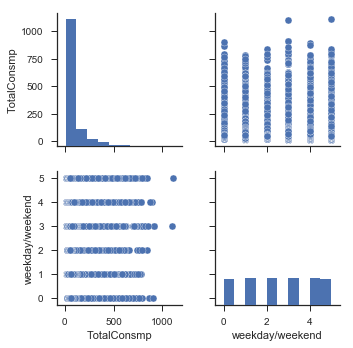

In [5]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(weekdays_only, vars=["TotalConsmp", "weekday/weekend"])

In [6]:
weekends_only = data[data['weekday/weekend'] > 5 ]
weekends_only.describe()

,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,R5,...,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility,weekday/weekend
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,...,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.0
mean,98.943713,21.831098,40.209888,20.471112,40.376919,22.275582,39.456960,20.736805,39.284609,19.636207,...,22.479909,43.211228,19.526879,42.070045,7.686985,755.428710,80.404423,4.404057,38.050073,6.0
std,93.683990,1.487796,4.383534,2.137731,4.345323,1.909743,3.593066,1.948171,4.772045,1.931088,...,1.741166,6.167037,2.005476,4.496153,5.455817,8.092232,15.775681,2.429243,10.502973,0.0
min,20.000000,17.600000,31.426667,16.390000,30.160000,18.100000,33.071429,15.600000,30.723333,15.335000,...,17.890000,30.890000,15.100000,32.290000,-2.720000,732.900000,24.000000,1.000000,3.000000,6.0
25%,50.000000,20.890000,36.663333,19.000000,37.590000,20.856667,36.560000,19.390000,35.156667,18.100000,...,21.290000,38.185833,18.033333,38.700000,3.377500,750.600000,70.333333,2.333333,30.000000,6.0
50%,70.000000,21.700000,39.700000,20.323333,40.290000,22.100000,38.730000,20.500000,38.293333,19.290000,...,22.323333,41.745000,19.390000,40.900000,6.870000,754.691667,85.833333,4.000000,40.000000,6.0
75%,110.000000,22.700000,42.933333,21.600000,43.060833,23.000000,42.500000,21.755500,43.000000,20.700000,...,23.856667,49.027500,20.533333,45.561667,11.300000,761.550000,93.000000,6.000000,40.000000,6.0
max,870.000000,25.200000,54.666667,29.856667,54.090000,28.100000,50.163333,25.166667,51.090000,24.550000,...,26.290000,55.400000,23.350000,51.590000,26.100000,769.900000,99.000000,13.000000,65.000000,6.0


In [7]:
data.describe()

,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,R5,...,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility,weekday/weekend
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,101.496833,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,2.977249
std,104.380829,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,1.985617
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,0.000000
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,1.000000
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.000000
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,5.000000
max,1110.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,6.000000


In [8]:
corr_matrix = data.corr()
corr_matrix["TotalConsmp"].sort_values(ascending=False)

TotalConsmp        1.000000
R2                 0.117511
R6                 0.109538
H_1                0.092634
TempOutSide        0.091733
Windspeed          0.090156
R3                 0.076143
R1                 0.052673
H_3                0.045618
R4                 0.038891
R8                 0.033436
H_4                0.025402
H_5                0.017569
R7                 0.015052
R5                 0.013422
Visibility         0.001750
R9                -0.002149
weekday/weekend   -0.004584
Press_mm_hg       -0.035069
H_9               -0.051213
H_7               -0.051987
H_2               -0.055513
H_6               -0.070009
H_8               -0.091385
H_OutSide         -0.144363
Name: TotalConsmp, dtype: float64